In [1]:
# General Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn packages
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [2]:
train_df = pd.read_csv("./data/train_data_after_EDA.csv", dtype={ 29 : str})

In [3]:
X = train_df.drop(["Claim Injury Type","Agreement Reached", "WCB Decision"], axis = 1)
y = train_df["Claim Injury Type"]

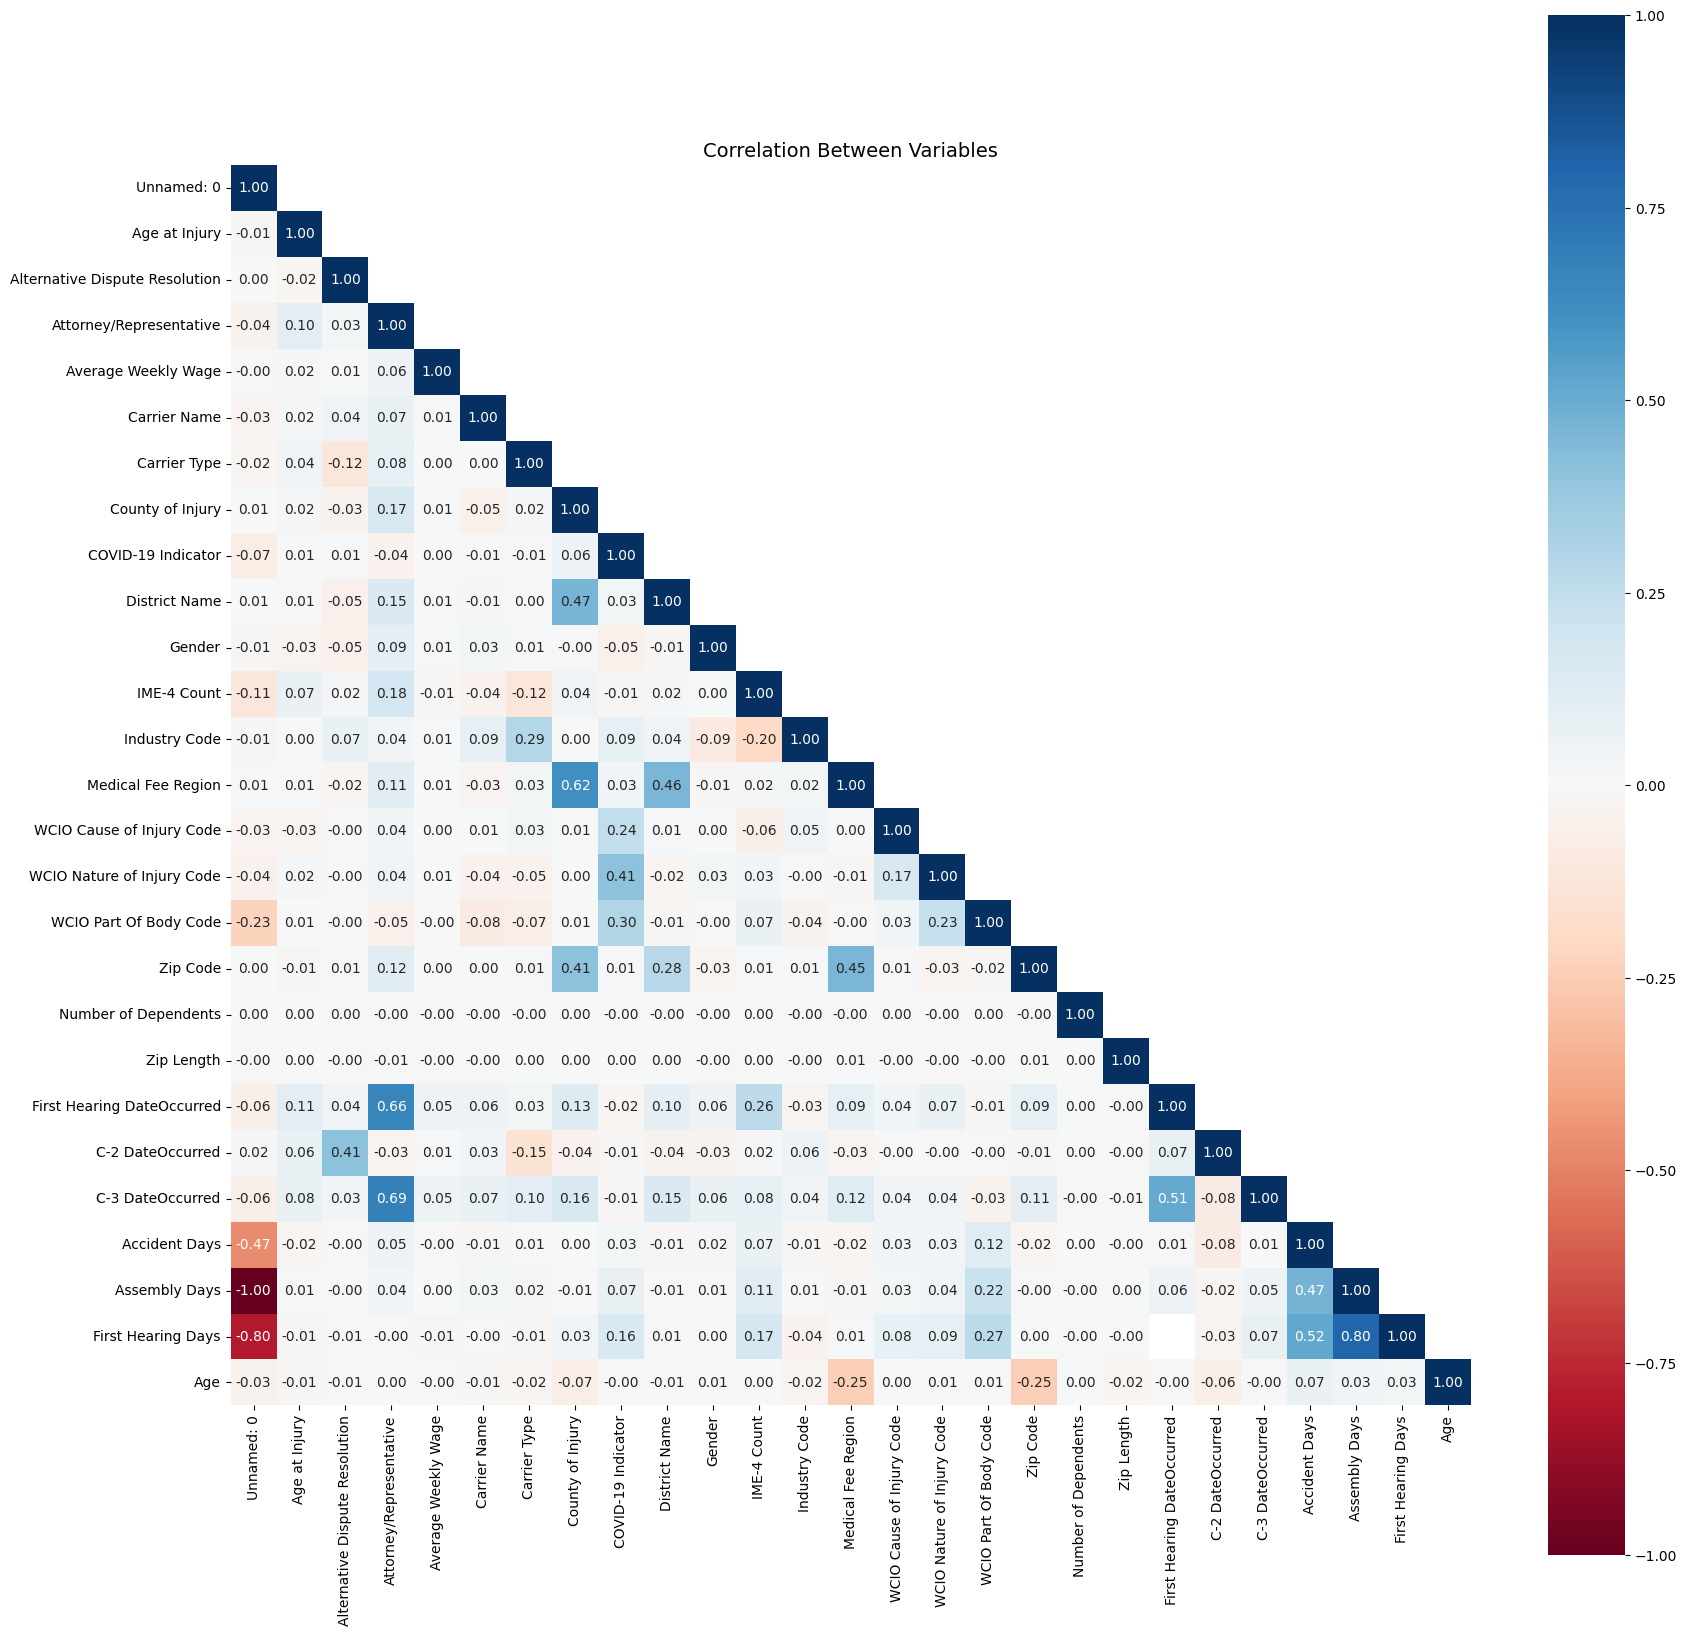

In [4]:
# initial correlation matrix with the respective values
corr_matrix = X.corr()

mask = np.tri(*corr_matrix.shape, k=0, dtype=bool)
# Keeps values where mask is True
corr_matrix = corr_matrix.where(mask)

# defines the figure size
fig, ax = plt.subplots(figsize=(20, 20))
# heatmap of the initial correlation matrix
l = sns.heatmap(corr_matrix, square=True, annot=True, fmt=".2f", vmax=1, vmin=-1, cmap='RdBu', ax=ax)
plt.title('Correlation Between Variables', size=14)
plt.show()

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.25, random_state = 42, stratify = y, shuffle = True)
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_val = mm.transform(X_val)
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=None).fit(X_train, y_train)
dt_train_pred = dt.predict(X_train)
dt_val_pred = dt.predict(X_val)

print("Classification Report for Training Data:")
print(classification_report(y_train, dt_train_pred))

# Generate the classification report for validation data
print("Classification Report for Validation Data:")
print(classification_report(y_val, dt_val_pred))

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.74      0.38      0.51      9358
           1       0.83      0.98      0.90    218308
           2       0.52      0.01      0.02     51679
           3       0.66      0.91      0.76    111380
           4       0.71      0.25      0.37     36210
           5       0.00      0.00      0.00      3158
           6       0.00      0.00      0.00        73
           7       0.00      0.00      0.00       353

    accuracy                           0.77    430519
   macro avg       0.43      0.32      0.32    430519
weighted avg       0.73      0.77      0.70    430519

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.75      0.40      0.52      3119
           1       0.83      0.98      0.90     72770
           2       0.56      0.01      0.02     17227
           3       0.66      0.91      0.76     